# Airbnb data cleaning excericse

Importing the libraries needed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv file and converting it to a dataframe

In [4]:
airbnb_data = pd.read_csv("C:/Users/Charlotte Abraham/Desktop/BlosoomAcademy/Assignments/airbnb_data.csv")

Inspecting first 20 rows of the dataset

In [5]:
airbnb_data.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


Checking  for non-null count and data type of the various columns 

In [6]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

Checking for the dimension of the data set

In [7]:
airbnb_data.shape

(213451, 16)

Checking for the total number of null values in each column

In [8]:
airbnb_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

Checking for duplicated rows

In [9]:
duplicates = airbnb_data.duplicated()
airbnb_data[duplicates]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


From the table above, we can can conclude that the dataset has no duplicated rows

## Cleaning various columns and transforming the data types

Casting the data type from a string to datetime

In [10]:
airbnb_data['date_account_created'] = pd.to_datetime(airbnb_data['date_account_created'],
                                           infer_datetime_format = True,
                                           errors = 'coerce') 

In [11]:
airbnb_data['date_account_created'].head()

0   2010-06-28
1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
Name: date_account_created, dtype: datetime64[ns]

Casting the data type from a string to datetime and transforming the date format to year-month-day-hrs-mins-secs

In [12]:
airbnb_data['timestamp_first_active']= pd.to_datetime(airbnb_data['timestamp_first_active'], format= '%Y%m%d%H%M%S' )

In [13]:
airbnb_data['timestamp_first_active'].head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]

Drop the coluumn because the nulll values make up more than 50% of the data

In [14]:
print(airbnb_data['date_first_booking'].value_counts(dropna = False))

NaN           124543
2014-05-22       248
2014-06-11       231
2014-06-24       226
2014-05-21       225
               ...  
2010-02-17         1
2010-03-04         1
2010-02-23         1
2010-02-27         1
2015-06-28         1
Name: date_first_booking, Length: 1977, dtype: int64


In [15]:
airbnb_data.drop("date_first_booking", axis = 1, inplace = True)

In [16]:
airbnb_data.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


From the table above dataframe,we can confirm that the date_first_booking has been deleted

In [20]:
columns=["gender","language","affiliate_channel","affiliate_provider","first_affiliate_tracked","signup_app",
        "first_device_type","first_browser","country_destination"]
for col in columns:
    print(col)
    print(airbnb_data[col].value_counts())
    print("\n")

gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64


language
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64


affiliate_channel
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64


affiliate_provider
direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-

Renaming the unknown category to OTHER category

In [22]:
airbnb_data.loc[airbnb_data.gender == '-unknown-','gender']= 'OTHER'

In [23]:
airbnb_data['gender'].unique()

array(['OTHER', 'MALE', 'FEMALE'], dtype=object)

Replacing the null values in the age with the median age

In [24]:
#checking for the median age
airbnb_data['age'].median()

34.0

In [25]:
#replace the null values with the median age
airbnb_data['age'] = airbnb_data['age'].fillna(34).astype(int)

In [26]:
airbnb_data.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,OTHER,34,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,OTHER,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [207]:

print(airbnb_data['age'].value_counts())

34      93019
30       6124
31       6016
29       5963
28       5939
        ...  
1925        1
1935        1
1933        1
112         1
1926        1
Name: age, Length: 127, dtype: int64


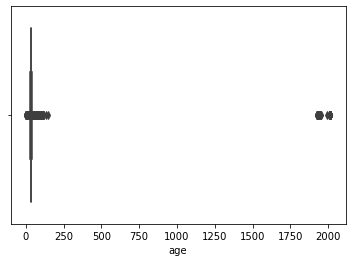

In [208]:
sns.boxplot(x = airbnb_data['age'])
plt.show()

There are some outliers in the age distribution

In [209]:
airbnb_data.loc[airbnb_data['age']>100,['age']]=34.0
airbnb_data.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,OTHER,34,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,OTHER,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [27]:
airbnb_data.isnull().sum()

id                            0
date_account_created          0
timestamp_first_active        0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    6065
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
dtype: int64

We have sucessfully replaced the the null values in age column with the median

In [213]:
airbnb_data['first_affiliate_tracked'].mode()

0    untracked
dtype: object

In [214]:
airbnb_data['first_affiliate_tracked'] = airbnb_data['first_affiliate_tracked'].fillna("untracked")

In [215]:
airbnb_data.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [216]:
airbnb_data['first_affiliate_tracked'].value_counts()

untracked        115297
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

We have successfully  replaced the null values in first_affiliate_tracked with its mode value i.e untracked